In [180]:
from sklearn.gaussian_process import kernels
from sklearn.gaussian_process import GaussianProcessClassifier
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [166]:
_kernel = kernels.RBF() + kernels.Matern()

In [167]:
test = pd.read_csv("../test_data_scleroporus.csv", index_col=0)
train = pd.read_csv("../train_data_scleroporus.csv", index_col=0)

In [168]:
testY = test['testPres']
testX = test[['bio1', 'bio5', 'bio6']]
trainY = train['trainPres']
trainX = train[['bio1', 'bio5', 'bio6']]

In [169]:
gpc = GaussianProcessClassifier(kernel=_kernel)

In [170]:
gpc.fit(trainX, trainY)

GaussianProcessClassifier(copy_X_train=True,
             kernel=RBF(length_scale=1) + Matern(length_scale=1, nu=1.5),
             max_iter_predict=100, multi_class='one_vs_rest', n_jobs=1,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=None, warm_start=False)

In [171]:
preds = gpc.predict(testX)
scores = list(zip(*gpc.predict_proba(testX)))[1]

In [172]:
fpr, tpr, thresh = roc_curve(testY, scores)

In [173]:
roc_auc = roc_auc_score(testY, scores)

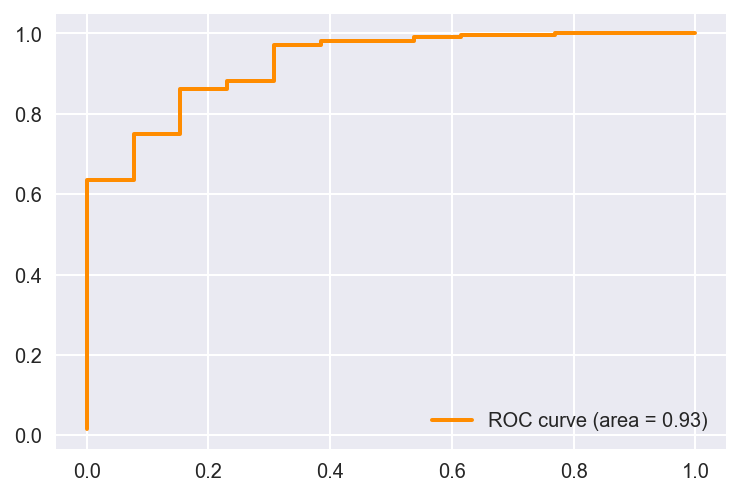

In [182]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend()
plt.show()


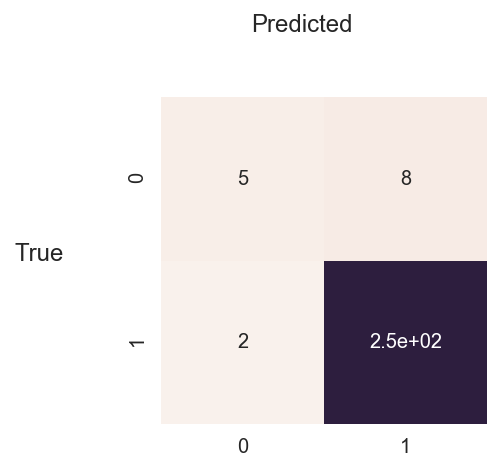

In [185]:
norm_confusion = confusion_matrix(testY, preds)
fig, ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(norm_confusion, cbar=False, annot=True, 
                 xticklabels=["0", "1"], 
                 yticklabels=["0", "1"], 
                 ax=ax,
                 square=True)
ax.text(0.55, 2.4, "Predicted", fontsize=12)
ax.text(-0.9, 1, "True", fontsize=12)
plt.show()

SyntaxError: invalid syntax (<ipython-input-176-f25063b4542d>, line 1)